# Lecture 21 - Introduction to Deep Learning

Until the late 2000's, the broader class of systems that fell under the label **machine learning** heavily relied on **feature engineering**. Features are transformations on input data that result in numerical features that facilitate a downstream algorithm, like a classifier, to produce correct outcomes on new data. Feature engineering is aimed at taking the original data and coming up with representations of the same data that can then be fed to an algorithm to solve a problem.

**Deep learning**, on the other hand, deals with finding such representations automatically, from raw data, in order to successfully perform a task. This is not to say that **feature engineering** has no place with deep learning; we often need to inject some form of prior knowledge in a learning system. However, the ability of a neural network to ingest data and extract useful representations on the basis of examples is what makes deep learning so powerful. The focus of deep learning practitioners is not so much on hand-crafting those representations, but on operating on a mathematical entity so that it discovers representations from the training data autonomously. Often, these automatically-created features are better than those that are hand-crafted! As with many disruptive technologies, this fact has led to a change in perspective.

<div><img src="figures/deeplearning.png", width="700"><!div>

At the core of **deep learning** are **neural networks**, mathematical entities capable of representing complicated functions through a composition of simpler functions.

In today's lecture we will study some of the state-of-the-art pre-trained deep learning models:
1. a model that can label an image according to its content (includes AlexNet, ResNet and Inception v3)
2. another that can fabricate a new image from a real image (includes GAN and CycleGAN)
3. a model that can describe the content of an image using proper English sentences (includes NeuralTalk2)

## A pre-trained network that recognizes the subject of an image

The pre-trained network we'll explore now has been trained on a subset of the [ImageNet data set](http://www.image-net.org/). ImageNet is a very large dataset of over 14 million images maintained by Stanford University. All images are labeled with a hierarchy of nouns coming from the WordNet dataset, in turn a large lexical database of the English language.

The ImageNet data set, like several other public datasets, has its origin in academic competitions. For example, the Large Scale Visual Recognition Challenge (ILSVRC) is based on a few tasks, which can vary by the year, such as image classification (telling what object categories the image contains), object localization (identifying objects' position in images), object detection (identifying and labeling objects in images), scene classification (classifying a situation in an image), scene parsing (segmenting an image into regions associated with semantic categories, such as cow, house, cheese, hat). In particular, the image classification task consists in taking an image in input and producing a list of 5 labels out of 1000 total categories, ranked by confidence, describing the content of the image.

<div><img src="figures/inference.png", width="700"><!div>

We are going to discuss and run pre-trained networks on ImageNet using the [TorchVision](https://pytorch.org/docs/stable/torchvision/index.html) project. It contains a few of the best performing neural
network architectures for computer vision, provides easy access to datasets like ImageNet and other utilities for getting up to speed with computer vision applications in PyTorch.

The uppercase names correspond to classes that implement popular architectures for computer vision. 

The lowercase names, on the other end, are functions that instantiate models with pre-defined number of layers and units and optionally download and load pre-trained weights into them. 

For instance, ```resnet101``` returns an instance of ```ResNet``` with 101 layers, with ```resnet18``` with 18 layers and so on.

Note that there's nothing fundamental about using one of these functions. They just make it convenient to instantiate the model with a number of layers and units that matches how pre-trained networks were built.

### AlexNet

The AlexNet architecture won the 2012 ImageNet Large-Scale Visual Recognition Challenge by a large margin, with a top 5 test error rate (i.e. correct label must be in the top 5 predictions) of 15.4%. By comparison, the second best submission, not based on a deep network, trailed at 26.2%.

AlexNet is one of early breakthrough networks in deep learning and in particular, image recognition.

AlexNet is a **convolutional neural network (CNN)** and its architecture is depicted below:

<div><img src="figures/AlexNet.png", width="700"><!div>

Input images come in from the left and go through five stacks of filters (through convolution operations), each producing a number of output images as reported in the figure. After each filter images are reduced in size, as annotated. The images produced by the last stack of filters are layed out as a 4096-elements 1-D vector and classified to produce 1000 output probabilities, one for each output class.

At this point ```alexnet``` is an object that can run the AlexNet architecture. It is only a shell that needs to be trained or, instead, we can load pre-trained weights.

### ResNet (Residual Network)

Using the ```resnet101``` function, we'll now instantiate a 101-layer convolutional neural network.

Just to put things in perspective, before the advent of residual networks 2015, achieving a stable training at such depths was considered extremely hard. Residual networks pulled a trick that made it possible and by doing that beat several benchmarks in one sweep that year.

Residual neural networks use what's called *skip connections*, or shortcuts to jump over some layers. A typical ResNet will have double or triple layer skips.

The motivation comes, yet again, from brain structures, in particular, cortical layer IV neurons (pyramidal cells).

Let's pre-process any input image so that it has the right size and so that its values (its colors) sit roughly in the same numerical range as the training data (ImageNet).

In [2]:
from torchvision import transforms

preprocess = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(
mean=[0.485, 0.456, 0.406],
std=[0.229, 0.224, 0.225]
)])

In this case, we defined a pre-process function that will scale the input image to $256 \times 256$, crop the image to $224 \times 224$ around the center, transform it to a tensor, and normalize its RGB components so that they have defined means and standard deviations.

We can start by loading an image from the local filesystem using **Pillow**.

Pillow is the friendly PIL fork. PIL is the Python Imaging Library, adds image processing capabilities to your Python interpreter.

To install it with Anaconda, follow the steps here: https://anaconda.org/anaconda/pillow

In [1]:
from PIL import Image

img = Image.open("figures/bobby.jpg")

In [3]:
import torch

#

The process of running a trained model on new data is called *inference* in deep learning circles. In order to do inference, we need to put the network in *eval* mode.

To see the list of predicted labels, we will load a text file listing the labels in the same order they were presented to the network during training, then pick out the label at the index that produced the highest score from the network.

In [21]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [5]:
img = Image.open("figures/Maggie.jpg")

# 

In [6]:
img = Image.open("figures/Maggie2.jpg")

#

We've just ran a network that won an image classification competition in 2015! It learned to recognize our dog from examples of dogs, together with a ton of other real-world subjects. We'll now see how different architectures can achieve other kinds of tasks, starting with image generation.

## A pre-trained model that fakes it until it makes it

Suppose that you want to train a model that is able to detect a local artist paintings. You have gathered  a few images but you need a lot more data. So you create a network that generates fake paintings based on the images you already have.

From each fake image, you ask the local artist if that characterizes his/her techniques. S/he will perhaps indicate where in the image it is clear that it is not his/her work. And so you use that information in some way to modify the generation of fake images.

### GAN

This is the basic idea of **Generative Adversarial Networks (GANs)**. A GAN has two architectures competing with one another: the *generative network* generates candidates while the *discriminative or adversarial network* evaluates them.

These networks are one of the most original outcomes of recent deep learning research; firstly introduced by Ian Goodfellow in 2014.

* Current conferences have competitions of these type of networks to handle *white-box attacks* and *black-box attacks*.

The end-goal for the **generator** is to fool the discriminator into mixing up real and fake images. 
The end-goal for the **discriminator** is to find out when it's being tricked, but it also helps inform the generator about the identifiable mistakes that the generated images have.

<div><img src="figures/GAN.png", width="700"><!div>

### CycleGAN

An interesting evolution of this concept is CycleGAN. A CycleGAN can turn images of one domain into images of another domain (and back), without the need for explicitly providing matching pairs in the training set.

<div><img src="figures/CycleGAN.png", width="700"><!div>

As the figure shows, the first generator learns to produce an image conforming to a target distribution (zebras, in this case) starting from an image belonging to a different distribution (horses), so that the discriminator can’t tell if the image produced from a horse photo is actually a genuine picture of a zebra or not. 

At the same time, and here’s where the Cycle prefix in the acronym comes in, the resulting fake-zerba is sent through a different generator going the other way, zebra to horse in our case, to be judged by another discriminator on the other side. Creating such cycle stabilizes the training process considerably, which addresses one of the original issues with GANs.

The fun part is that at this point we don't need pairs of matched horse/zebra as ground truths.

### A network that turns horses into zebras

The CycleGAN network has been trained on a dataset of (unrelated) horse images and zebra images extracted from the ImageNet dataset.

The network learns to take an image of one or more horses and turn them all into zebras, leaving the rest of the image as unmodified as possible.

In [5]:
import torch.nn as nn

class ResNetBlock(nn.Module):

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [ ]:
netG = ResNetGenerator()

In [7]:
model_data = torch.load('horse2zebra_0.4.0.pth')

netG.load_state_dict(model_data)

<All keys matched successfully>

In [ ]:
netG.eval()

In [9]:
preprocess = transforms.Compose([transforms.Resize(256),transforms.ToTensor()])

In [7]:
img = Image.open("figures/horse.jpg")

#

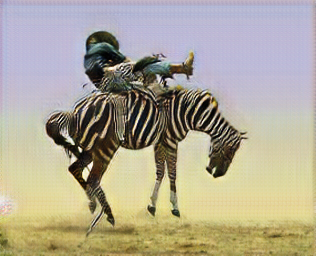

In [13]:
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)

# # out_img.save('../data/p1ch2/zebra.jpg')
# out_img

## A pre-trained network that describes scenes

In order to get first-hand experience with a model involving **natural language**, we will now use a pre-trained image captioning model that implements the **NeuralTalk2** model by Andrej Karpathy. 

What this kind of model does when presented with a natural image is generate a caption in English describing the scene. The model is trained on a large dataset of images along with a paired sentence description, e.g. "A Tabby cat is leaning on a wooden table, with one paw on a laser mouse and the other on a black laptop".

<div><img src="figures/NeuralTalk2.png", width="700"><!div>

This captioning model has two connected halves. 

The first half of the model is a network that learns to generate "descriptive" numerical representations of the scene (Tabby cat, laser mouse, paw), which are then taken as input to the second half. 

That second half is a so-called **recurrent neural network** which generates a coherent sentence by putting those numerical descriptions together. The two halves of the model are trained together on image-caption pairs.

The second half is called recurrent because it generates its outputs (individual words) in subsequent forward passes, where the input to each forward pass includes the outputs of the previous forward pass. This generates a dependency of the next word on words that have been generated earlier, as one would expect when dealing with sentences, or more in general with sequences.

### NeuralTalk2

Some examples can be found here: https://cs.stanford.edu/people/karpathy/neuraltalk2/demo.html